In [1]:
from confpred.cp import run_cp
import matplotlib.pyplot as plt
import seaborn as sns
#run_cp('CIFAR10','entmax', 0.9, '23', model_type='vit')

/Users/margaridacampos/.pyenv/versions/entmaxcp/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import pandas as pd
import numpy as np
# test

In [19]:
summary_results = pd.DataFrame(columns=['dataset','score','alpha','avg_size','coverage'])
for dataset in ['CIFAR10','CIFAR100']:
    for loss in ['sparsemax','softmax','entmax']:
        for alpha in np.linspace(0.01,0.1,5):
            print(dataset+'_'+loss+'_'+'23'+'_'+str(alpha))
            avg_set_size, coverage = run_cp(dataset,loss,alpha,'23',model_type='vit')
            summary_results.loc[len(summary_results)] = dataset, loss,alpha, avg_set_size, coverage

CIFAR10_sparsemax_23_0.01
Files already downloaded and verified
Files already downloaded and verified
VIT model
Loading predictions.
CIFAR10_sparsemax_23_0.0325
Files already downloaded and verified
Files already downloaded and verified
VIT model
Loading predictions.
CIFAR10_sparsemax_23_0.05500000000000001
Files already downloaded and verified
Files already downloaded and verified
VIT model
Loading predictions.
CIFAR10_sparsemax_23_0.0775
Files already downloaded and verified
Files already downloaded and verified
VIT model
Loading predictions.
CIFAR10_sparsemax_23_0.1
Files already downloaded and verified
Files already downloaded and verified
VIT model
Loading predictions.
CIFAR10_softmax_23_0.01
Files already downloaded and verified
Files already downloaded and verified
VIT model
Loading predictions.
CIFAR10_softmax_23_0.0325
Files already downloaded and verified
Files already downloaded and verified
VIT model
Loading predictions.
CIFAR10_softmax_23_0.05500000000000001
Files already 

In [20]:
summary_results

,dataset,score,alpha,avg_size,coverage
0,CIFAR10,sparsemax,0.0100,1.1851,0.9906
1,CIFAR10,sparsemax,0.0325,1.0040,0.9660
2,CIFAR10,sparsemax,0.0550,1.0000,0.9646
3,CIFAR10,sparsemax,0.0775,1.0000,0.9646
4,CIFAR10,sparsemax,0.1000,1.0000,0.9646
5,CIFAR10,softmax,0.0100,7.1244,0.9849
6,CIFAR10,softmax,0.0325,6.5285,0.9647
7,CIFAR10,softmax,0.0550,5.9369,0.9460
8,CIFAR10,softmax,0.0775,5.3810,0.9226
9,CIFAR10,softmax,0.1000,4.9532,0.8975


/var/folders/q2/bjm3n1qd6jq1npksrk9n26nw0000gn/T/ipykernel_81297/3251405189.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='')


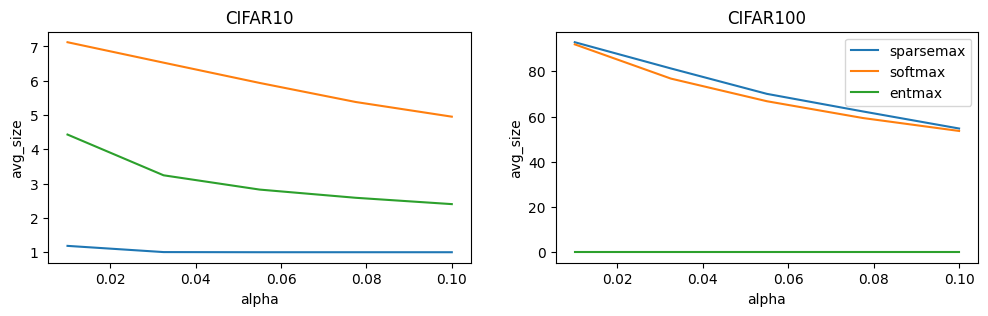

In [21]:
fig, axs = plt.subplots(1,2, figsize=(12,3))
for index, var in enumerate(summary_results['dataset'].unique()):
    df = summary_results[summary_results['dataset']==var]
    if index == len(summary_results['dataset'].unique())-1:
        sns.lineplot(df, x = 'alpha', hue = 'score',y='avg_size', ax = axs[index])
    else: 
        sns.lineplot(df, x = 'alpha', hue = 'score',y='avg_size', ax = axs[index], legend = False)    
    axs[index].set_title(var)
    axs[index].set_ylim
    plt.legend(title='')

/var/folders/q2/bjm3n1qd6jq1npksrk9n26nw0000gn/T/ipykernel_81297/3375878865.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='')
/var/folders/q2/bjm3n1qd6jq1npksrk9n26nw0000gn/T/ipykernel_81297/3375878865.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='')


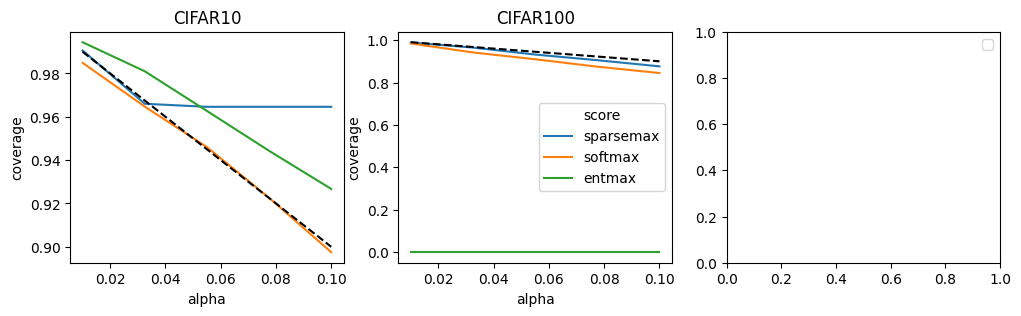

In [22]:
fig, axs = plt.subplots(1,3, figsize=(12,3))
for index, var in enumerate(summary_results['dataset'].unique()):
    df = summary_results[summary_results['dataset']==var]
    if index == len(summary_results['dataset'].unique())-1:
        sns.lineplot(df, x = 'alpha', hue = 'score',y='coverage', ax = axs[index])
    else: 
        sns.lineplot(df, x = 'alpha', hue = 'score',y='coverage', ax = axs[index], legend = False)
    axs[index].set_title(var)
    axs[index].plot([0.01,0.1],[0.99,0.9], label = 'Theoretical Baseline', c='black', linestyle = 'dashed')
    plt.legend(title='')

In [23]:
import pickle
from sklearn.metrics import accuracy_score

In [13]:
model_type = 'vit'
dataset_list = ['CIFAR10','CIFAR100']
loss_list = ['softmax','sparsemax','entmax']
seed_list = ['23']
transformation = 'logits'
dataset = dataset_list[0]
loss = loss_list[0]
acc_df = pd.DataFrame({'dataset':dataset_list}).merge(pd.DataFrame({'loss':loss_list}), how = 'cross').merge(pd.DataFrame({'seed':seed_list}), how = 'cross')
acc_df['cal_size'] = np.nan
acc_df['cal_acc'] = np.nan
acc_df['test_size'] = np.nan
acc_df['test_size'] = np.nan

for index, row in acc_df.iterrows():
    dataset = row['dataset']
    loss = row['loss']
    seed = row['seed']
    path = f'./data/predictions/{model_type}_{dataset}_test_{loss}_{transformation}_{seed}_proba.pickle'
    with open(path, 'rb') as f:
        test_proba = pickle.load(f)
    path = f'./data/predictions/{dataset}_{seed}_test_true.pickle'
    with open(path, 'rb') as f:
        test_true_enc = pickle.load(f)
    path = f'./data/predictions/{model_type}_{dataset}_cal_{loss}_{transformation}_{seed}_proba.pickle'
    with open(path, 'rb') as f:
        cal_proba = pickle.load(f)
    path = f'./data/predictions/{dataset}_{seed}_cal_true.pickle'
    with open(path, 'rb') as f:
        cal_true_enc = pickle.load(f)
    acc_df.at[index,'cal_acc'] = accuracy_score(cal_true_enc.argmax(axis = 1),cal_proba.argmax(axis = 1))
    acc_df.at[index,'test_acc'] = accuracy_score(test_true_enc.argmax(axis = 1),test_proba.argmax(axis = 1))
    acc_df.at[index,'cal_size'] = cal_true_enc.shape[0]
    acc_df.at[index,'test_size'] = test_true_enc.shape[0]

In [15]:
acc_df

,dataset,loss,seed,cal_size,cal_acc,test_size,test_acc
0,CIFAR10,softmax,23,3000.0,0.668000,10000.0,0.6632
1,CIFAR10,sparsemax,23,3000.0,0.965000,10000.0,0.9646
2,CIFAR10,entmax,23,3000.0,0.712667,10000.0,0.7761
3,CIFAR100,softmax,23,3000.0,0.557667,10000.0,0.4358
4,CIFAR100,sparsemax,23,3000.0,0.525667,10000.0,0.4874
5,CIFAR100,entmax,23,3000.0,0.803333,10000.0,0.7885


In [28]:
cal_true_enc

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])